In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [9]:
## For model selection and cross validation.
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score,f1_score,classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as metrics

### Ussed for encoding and feature engineering.
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression

In [10]:
# figure size in inches for Seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

import warnings
warnings.filterwarnings("ignore")  #### Hides warning messages to get cleaner outputs.
sns.set_theme(style = 'whitegrid')

In [13]:
uber_data=pd.read_csv('/content/cab_rides.csv')
weather_data=pd.read_csv('/content/weather.csv')
uber_data.head() #### To  check if the dataset is imported or not.

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [14]:
weather_data.head() #### To  check if the dataset is imported or not.

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


**Transformation of Data**

In [15]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          8287 non-null   float64
 1   cab_type          8287 non-null   object 
 2   time_stamp        8287 non-null   int64  
 3   destination       8287 non-null   object 
 4   source            8287 non-null   object 
 5   price             7653 non-null   float64
 6   surge_multiplier  8287 non-null   float64
 7   id                8287 non-null   object 
 8   product_id        8286 non-null   object 
 9   name              8286 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 647.5+ KB


In [16]:
uber_data.shape

(8287, 10)

In [17]:
uber_data.isnull().sum()

distance              0
cab_type              0
time_stamp            0
destination           0
source                0
price               634
surge_multiplier      0
id                    0
product_id            1
name                  1
dtype: int64

In [18]:

weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [19]:
weather_data.shape

(6276, 8)

In [20]:
weather_data.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [21]:
## Removing rows for missing price

uber_data.dropna(subset=['price'], inplace=True)

uber_data.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

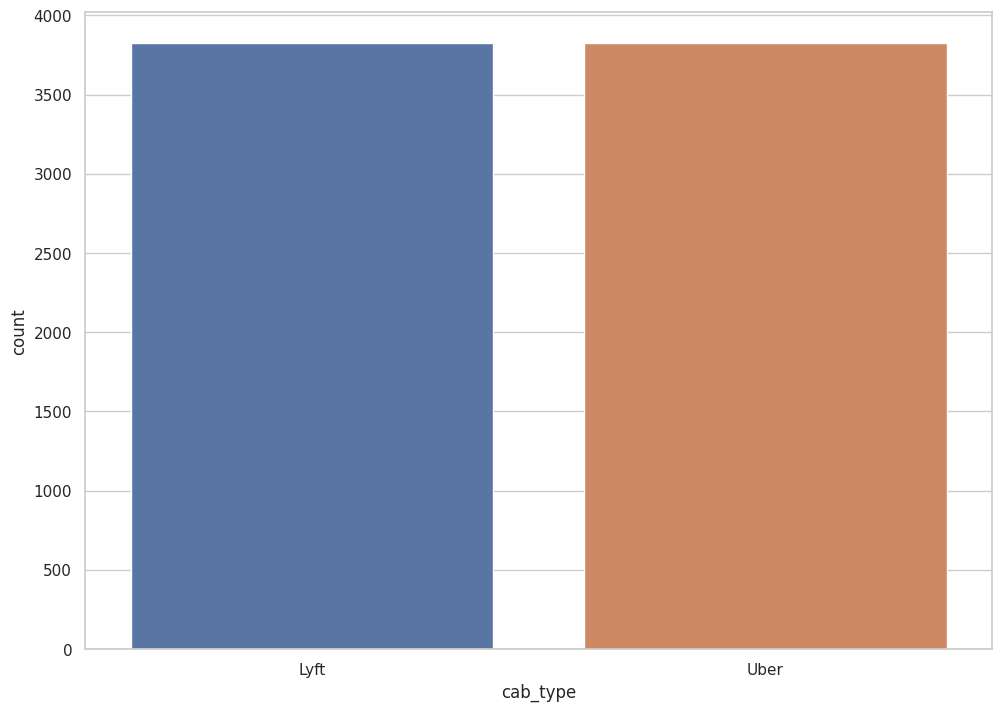

In [22]:
#new_data.cab_type.plot.bar()

ax = sns.countplot(data=uber_data, x='cab_type')

In [23]:
uber_data = uber_data.loc[uber_data['cab_type'] == 'Uber']

We drop rain collumn as there was no rain entire year. therefore it has missing values. We remove it as to avoid errors in prediction.

In [25]:
weather_data = weather_data.drop('rain', 1)

Convering timeStamp to Date time format for better analysis and modeling.

In [26]:
from datetime import datetime, date
uber_data['datetime']=pd.to_datetime(uber_data['time_stamp'],unit='ms', infer_datetime_format=True)
weather_data['date_time']=pd.to_datetime(weather_data['time_stamp'],unit='s',infer_datetime_format=True)

In [27]:
uber_data['Udate'] = uber_data.datetime.dt.date
weather_data['Wdate'] = weather_data.date_time.dt.date
uber_data.describe()

,distance,time_stamp,price,surge_multiplier
count,3829.000000,3.829000e+03,3829.000000,3829.0
mean,2.191201,1.544047e+12,15.811178,1.0
std,1.215184,6.874356e+08,8.589417,0.0
min,0.300000,1.543207e+12,4.500000,1.0
25%,1.250000,1.543446e+12,9.000000,1.0
50%,2.140000,1.543741e+12,12.500000,1.0
75%,2.840000,1.544819e+12,21.500000,1.0
max,7.460000,1.545160e+12,62.000000,1.0


In [29]:
weather_data.describe()

,temp,clouds,pressure,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,1.545159e+09,0.990000,18.180000


In [30]:
weather_data.loc[0:50,]

,temp,location,clouds,pressure,time_stamp,humidity,wind,date_time,Wdate
0,42.42,Back Bay,1.00,1012.14,1545003901,0.77,11.25,2018-12-16 23:45:01,2018-12-16
1,42.43,Beacon Hill,1.00,1012.15,1545003901,0.76,11.32,2018-12-16 23:45:01,2018-12-16
2,42.50,Boston University,1.00,1012.15,1545003901,0.76,11.07,2018-12-16 23:45:01,2018-12-16
3,42.11,Fenway,1.00,1012.13,1545003901,0.77,11.09,2018-12-16 23:45:01,2018-12-16
4,43.13,Financial District,1.00,1012.14,1545003901,0.75,11.49,2018-12-16 23:45:01,2018-12-16
5,42.34,Haymarket Square,1.00,1012.15,1545003901,0.77,11.49,2018-12-16 23:45:01,2018-12-16
6,42.36,North End,1.00,1012.15,1545003901,0.77,11.46,2018-12-16 23:45:01,2018-12-16
7,42.21,North Station,1.00,1012.16,1545003901,0.77,11.37,2018-12-16 23:45:01,2018-12-16
8,42.07,Northeastern University,1.00,1012.12,1545003901,0.78,11.28,2018-12-16 23:45:01,2018-12-16
9,43.05,South Station,1.00,1012.12,1545003901,0.75,11.58,2018-12-16 23:45:01,2018-12-16


**Merging two Datasets**

In [33]:
uber_data_Temp = uber_data.sample(n = 25000, random_state = 12345,replace=True) ### As the data is too much we work on only 25000 records

## Concatinating two datasets into one for modeling.

UberWeather = pd.merge(uber_data_Temp, weather_data, how='inner', left_on=['Udate','destination'], right_on=['Wdate','location'])

In [34]:
#UberWeather = pd.merge(uber_data, weather_data, how='left', left_on='Udate', right_on=Wdate)

UberWeather.shape

(964476, 21)

In [35]:
UberWeather.head()

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,Udate,temp,location,clouds,pressure,time_stamp_y,humidity,wind,date_time,Wdate
0,2.61,Uber,1543361608251,Beacon Hill,Northeastern University,28.5,1.0,c363e4b7-c08a-45cd-b4a8-b0f443b94e3d,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,2018-11-27,43.27,Beacon Hill,0.80,990.80,1543347920,0.71,8.30,2018-11-27 19:45:20,2018-11-27
1,2.61,Uber,1543361608251,Beacon Hill,Northeastern University,28.5,1.0,c363e4b7-c08a-45cd-b4a8-b0f443b94e3d,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,2018-11-27,45.27,Beacon Hill,1.00,989.02,1543320921,0.93,1.56,2018-11-27 12:15:21,2018-11-27
2,2.61,Uber,1543361608251,Beacon Hill,Northeastern University,28.5,1.0,c363e4b7-c08a-45cd-b4a8-b0f443b94e3d,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,2018-11-27,44.28,Beacon Hill,1.00,998.13,1543297520,0.89,14.34,2018-11-27 05:45:20,2018-11-27
3,2.61,Uber,1543361608251,Beacon Hill,Northeastern University,28.5,1.0,c363e4b7-c08a-45cd-b4a8-b0f443b94e3d,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,2018-11-27,44.11,Beacon Hill,0.99,1005.33,1543281514,0.90,11.30,2018-11-27 01:18:34,2018-11-27
4,2.61,Uber,1543361608251,Beacon Hill,Northeastern University,28.5,1.0,c363e4b7-c08a-45cd-b4a8-b0f443b94e3d,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,2018-11-27,44.28,Beacon Hill,1.00,998.20,1543297497,0.89,14.65,2018-11-27 05:44:57,2018-11-27


In [36]:
UberWeather.isnull().sum()

distance            0
cab_type            0
time_stamp_x        0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
datetime            0
Udate               0
temp                0
location            0
clouds              0
pressure            0
time_stamp_y        0
humidity            0
wind                0
date_time           0
Wdate               0
dtype: int64

**Feature Engineering**

In [37]:
UberWeather['Wweek']=UberWeather.date_time.dt.day_of_week
UberWeather['Whour']=UberWeather.date_time.dt.hour

In [38]:
UberWeather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964476 entries, 0 to 964475
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          964476 non-null  float64       
 1   cab_type          964476 non-null  object        
 2   time_stamp_x      964476 non-null  int64         
 3   destination       964476 non-null  object        
 4   source            964476 non-null  object        
 5   price             964476 non-null  float64       
 6   surge_multiplier  964476 non-null  float64       
 7   id                964476 non-null  object        
 8   product_id        964476 non-null  object        
 9   name              964476 non-null  object        
 10  datetime          964476 non-null  datetime64[ns]
 11  Udate             964476 non-null  object        
 12  temp              964476 non-null  float64       
 13  location          964476 non-null  object        
 14  clou

In [40]:
UberWeather.surge_multiplier = pd.to_numeric(UberWeather.surge_multiplier)
#to_numeric(a)

<Axes: >

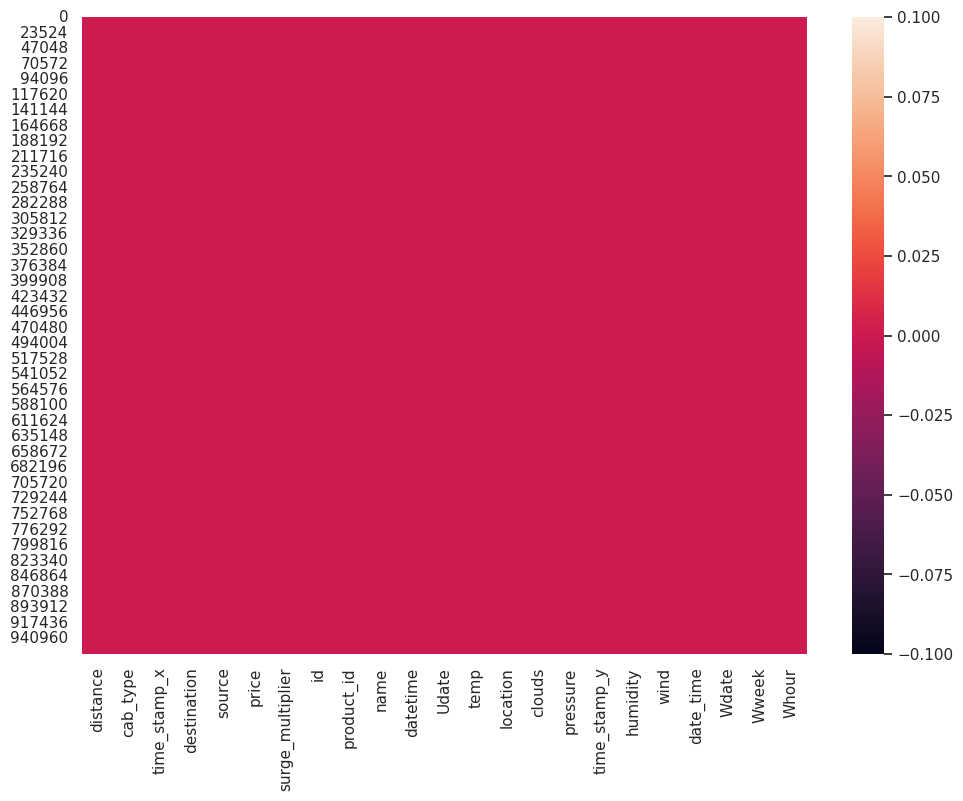

In [41]:
sns.heatmap(UberWeather.isnull())

In [42]:
UberWeather.fillna(0,inplace=True)

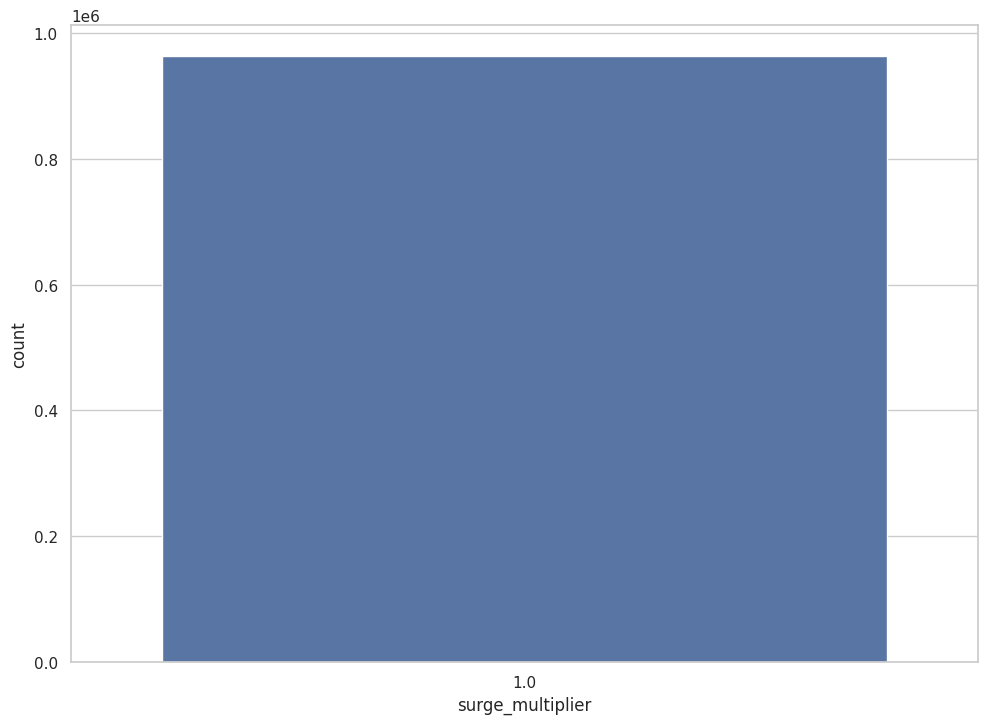

In [43]:
ax = sns.countplot(data=UberWeather, x='surge_multiplier')

In [44]:
UberWeather.columns

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'datetime',
       'Udate', 'temp', 'location', 'clouds', 'pressure', 'time_stamp_y',
       'humidity', 'wind', 'date_time', 'Wdate', 'Wweek', 'Whour'],
      dtype='object')

In [45]:
UberWeather.groupby('cab_type').count()

,distance,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,datetime,...,location,clouds,pressure,time_stamp_y,humidity,wind,date_time,Wdate,Wweek,Whour
cab_type,,,,,,,,,,,,,,,,,,,,,
Uber,964476,964476,964476,964476,964476,964476,964476,964476,964476,964476,...,964476,964476,964476,964476,964476,964476,964476,964476,964476,964476


**Explotary Data Analysis with final dataset**

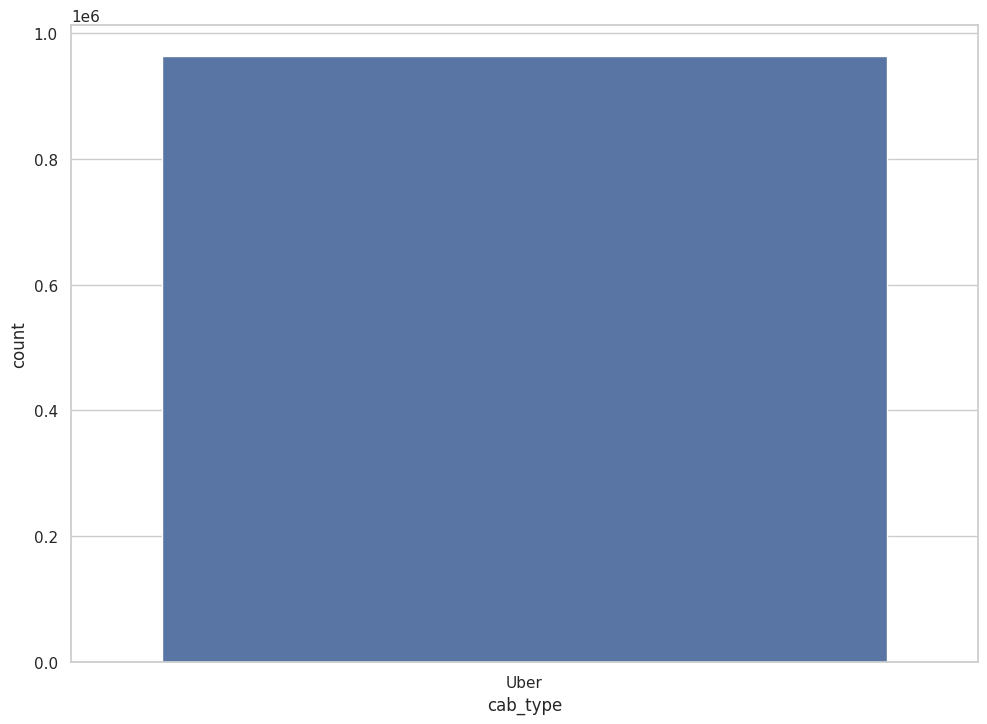

In [46]:
#new_data.cab_type.plot.bar()
ax = sns.countplot(data=UberWeather, x='cab_type')

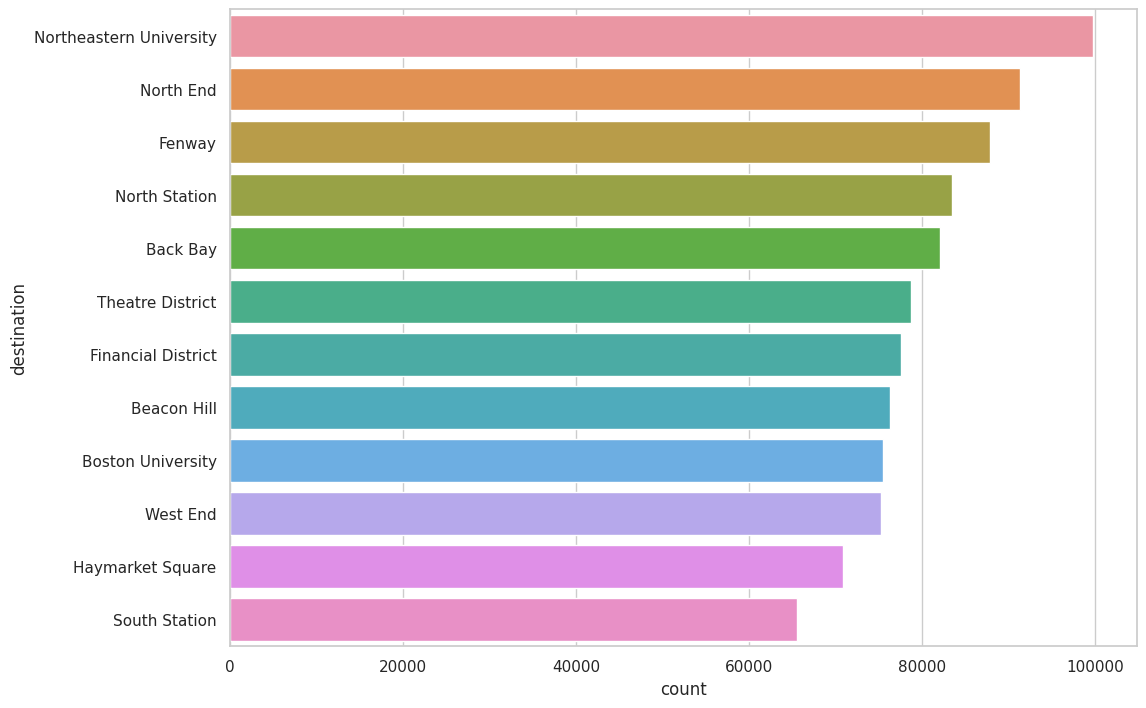

In [47]:
ax = sns.countplot(data=UberWeather, y='destination', order = UberWeather.destination.value_counts().index)

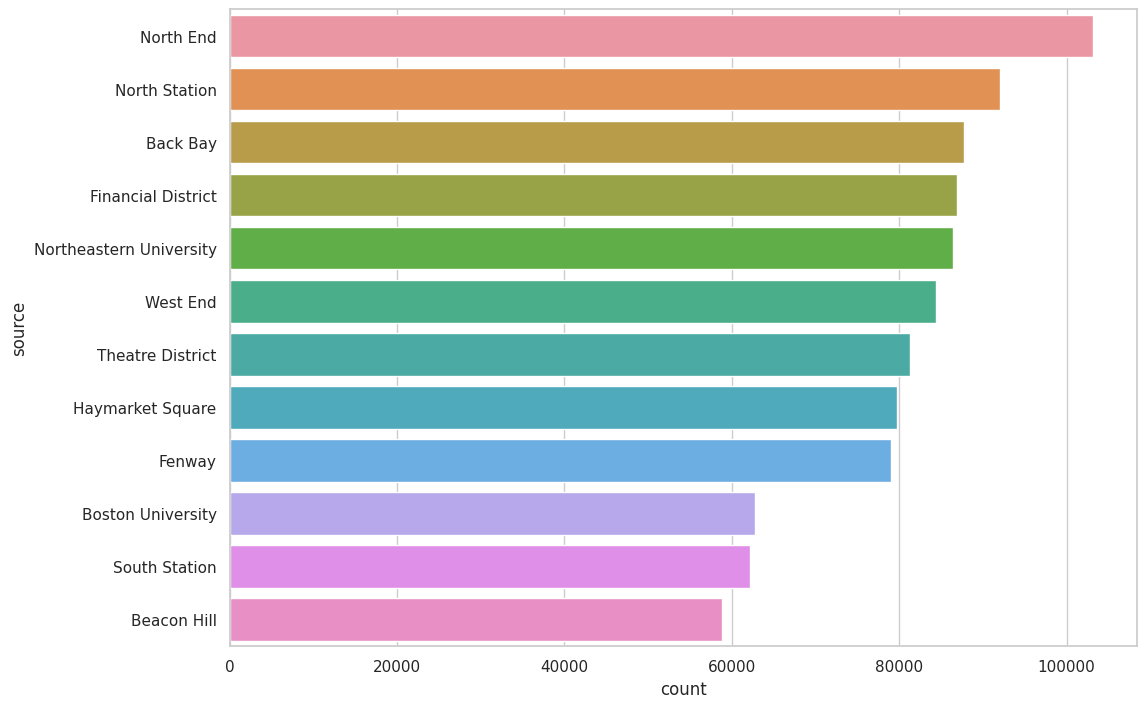

In [49]:
ax = sns.countplot(data=UberWeather, y='source', order = UberWeather.source.value_counts().index)

<Figure size 700x700 with 0 Axes>

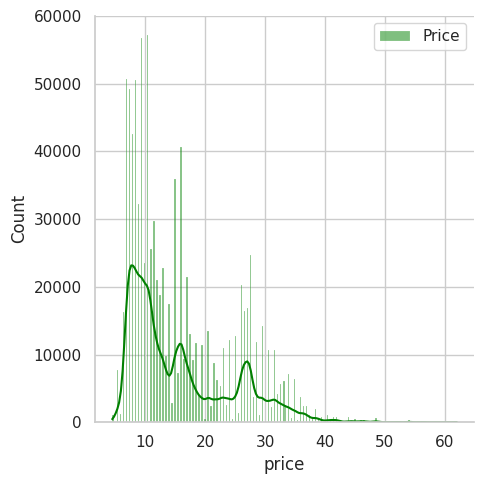

In [50]:
#UberWeather['price'].value_counts().plot(kind='hist',color='Blue')
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.price, color='green',label='Price', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

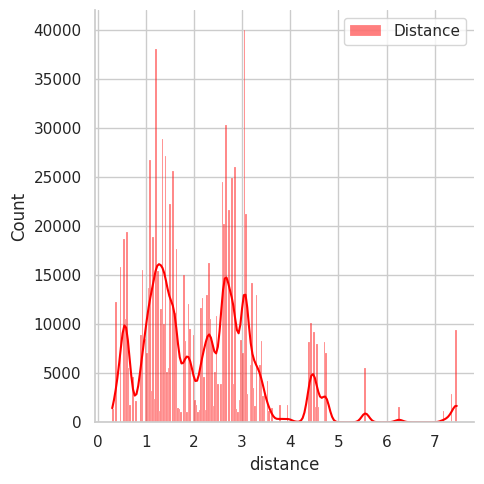

In [51]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.distance, color='red',label='Distance', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

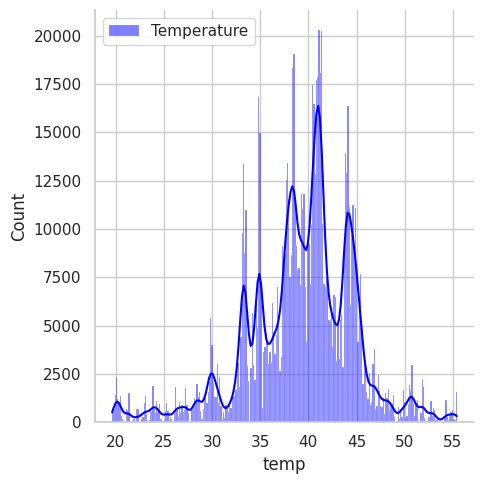

In [52]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.temp, color='blue',label='Temperature', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

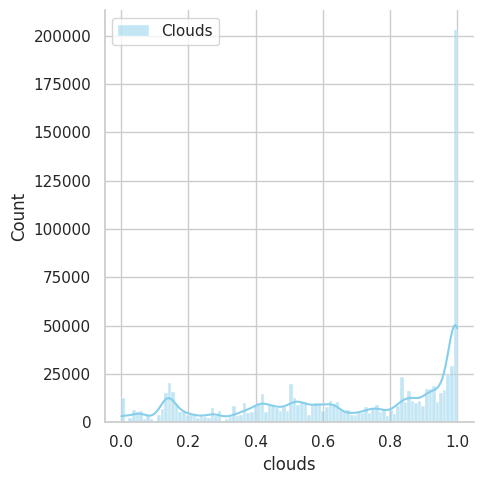

In [53]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.clouds, color='Skyblue',label='Clouds', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

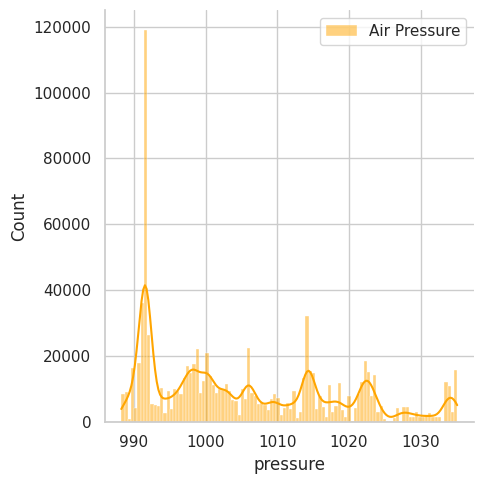

In [54]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.pressure, color='orange',label='Air Pressure', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

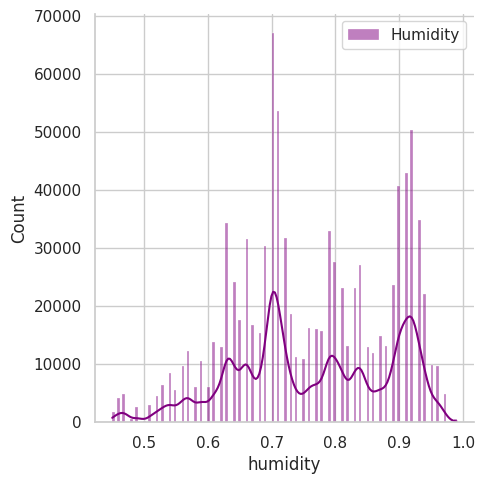

In [55]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.humidity, color='purple',label='Humidity', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

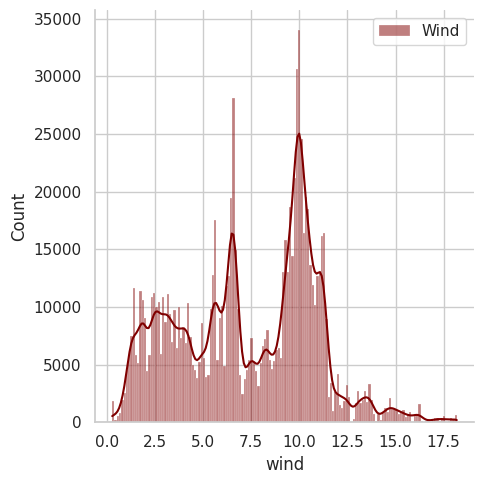

In [56]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.wind, color='maroon',label='Wind', kde=True)
plt.legend();

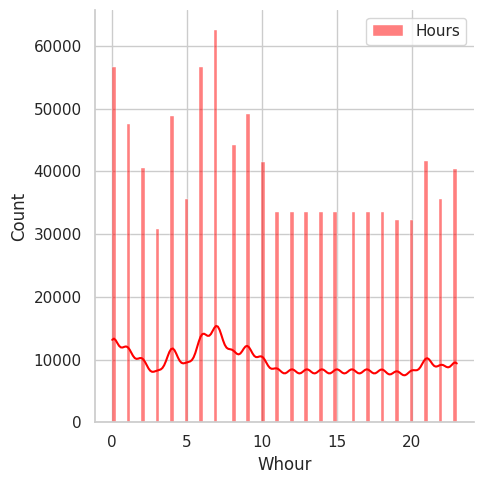

In [57]:
#UberWeather['hour'].value_counts().plot(kind='hist',color='orange')

sns.displot(UberWeather.Whour, color='red',label='Hours', kde=True)
plt.legend();

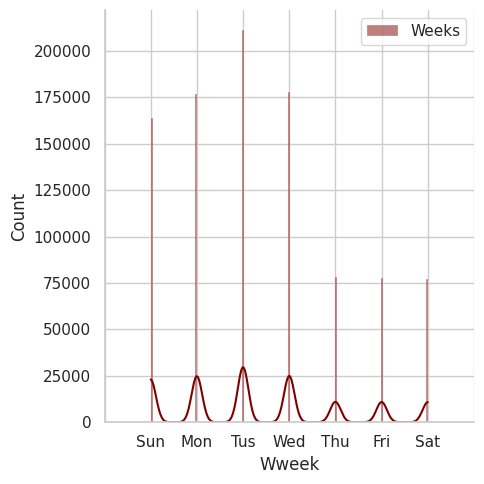

In [58]:
s = sns.displot(UberWeather.Wweek, color='maroon',label='Weeks', kde=True)
s.set_xticklabels(['','Sun','Mon','Tus','Wed','Thu','Fri','Sat',''])

plt.legend();

<Axes: xlabel='Whour', ylabel='price'>

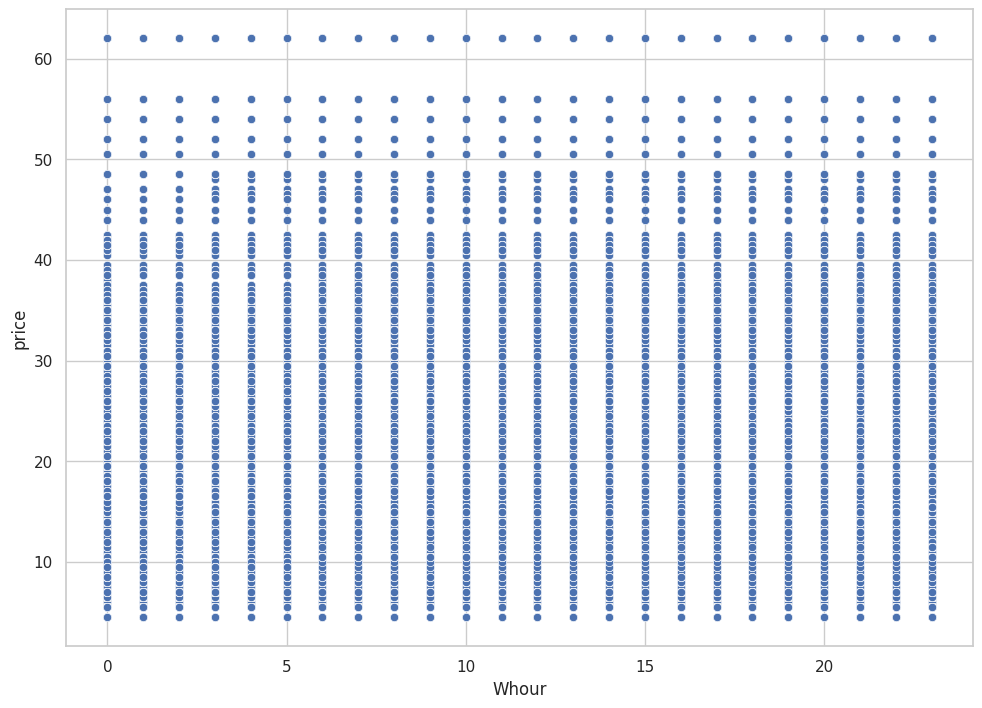

In [59]:
sns.scatterplot(data=UberWeather, x="Whour", y="price")

<Axes: xlabel='Wweek', ylabel='price'>

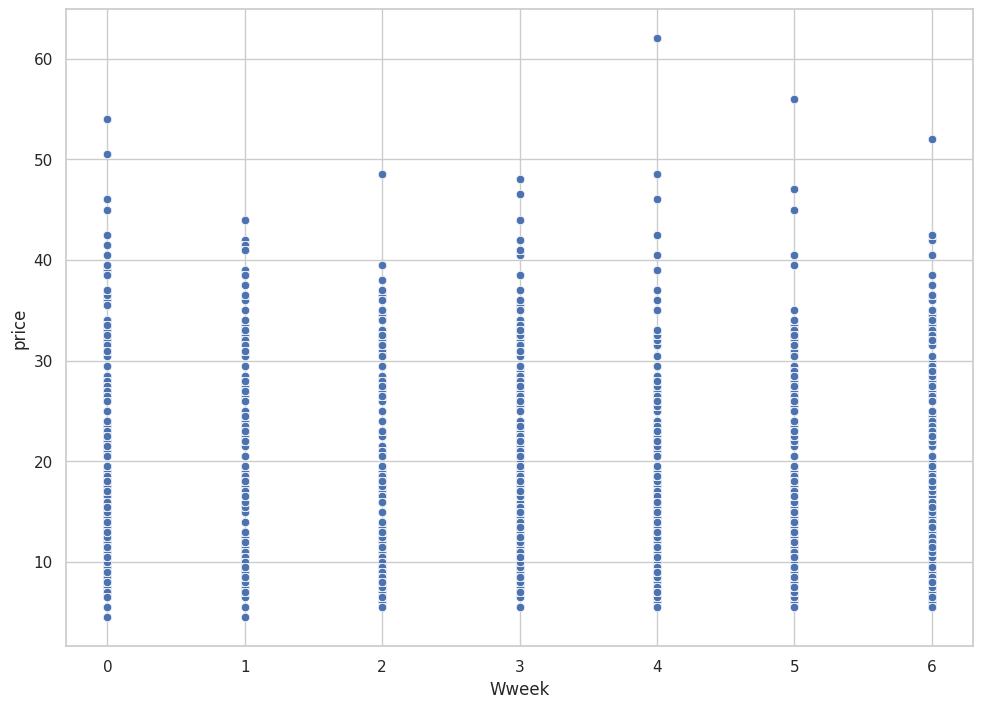

In [60]:
sns.scatterplot(data=UberWeather, x="Wweek", y="price")

<Axes: xlabel='distance', ylabel='price'>

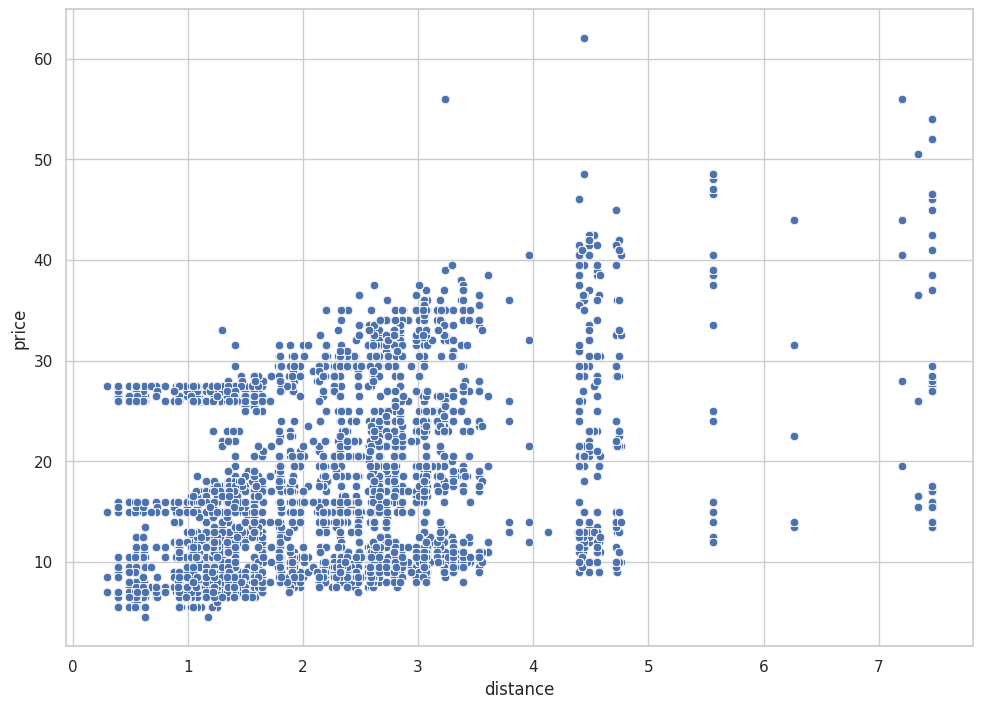

In [61]:
sns.scatterplot(data=UberWeather, x="distance", y="price")

<Axes: xlabel='temp', ylabel='price'>

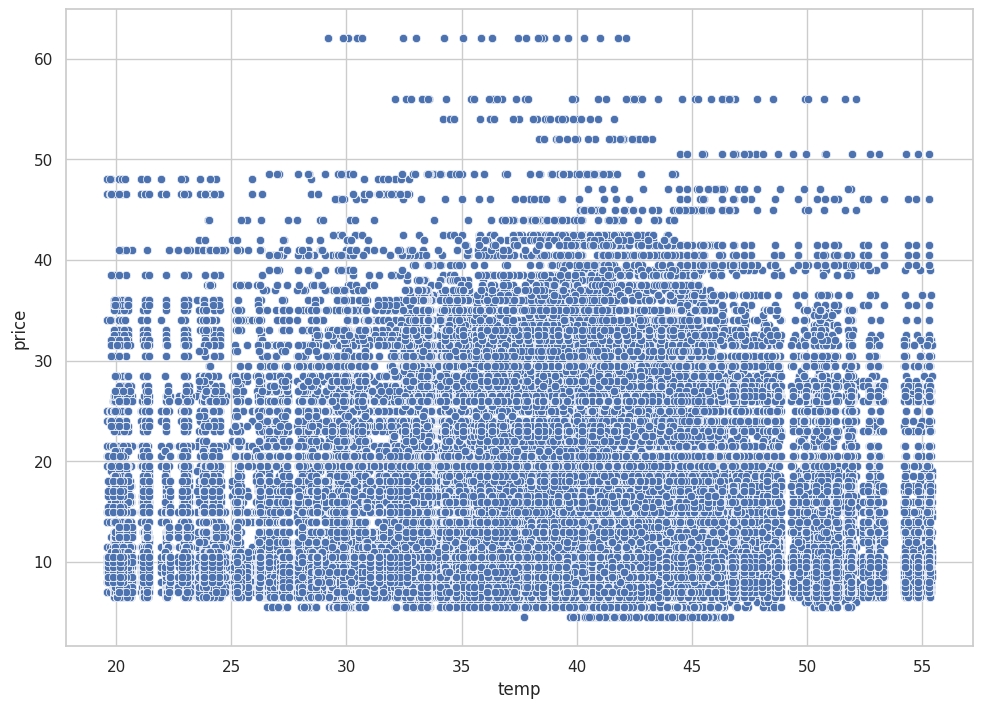

In [62]:
sns.scatterplot(data=UberWeather, x="temp", y="price")

<Axes: xlabel='clouds', ylabel='price'>

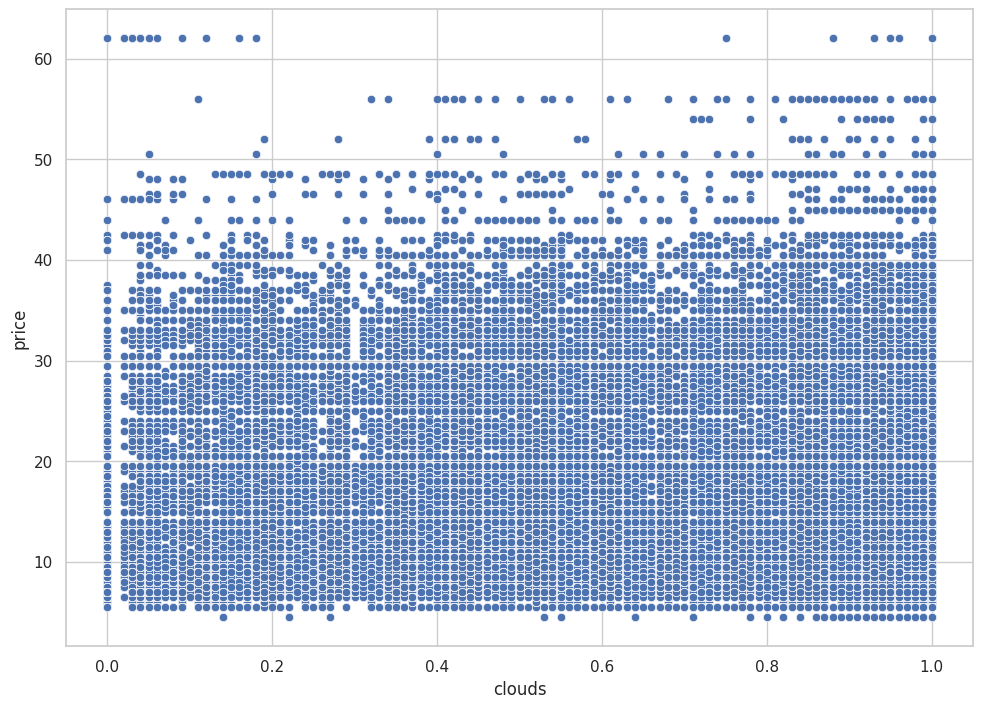

In [63]:
sns.scatterplot(data=UberWeather, x="clouds", y="price")

<Axes: xlabel='pressure', ylabel='price'>

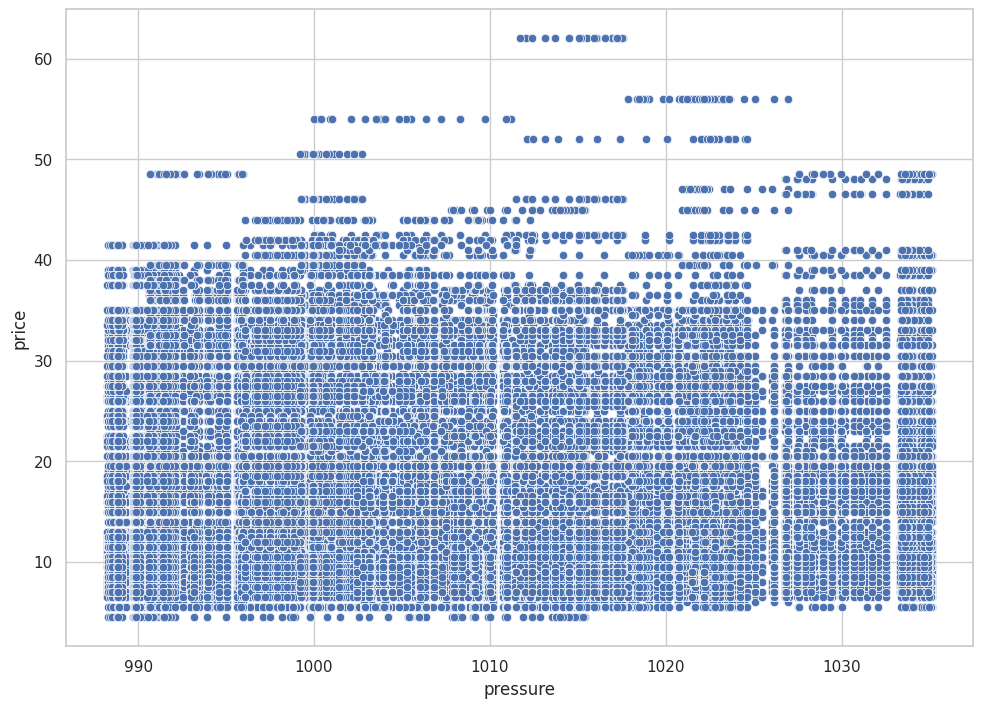

In [64]:
sns.scatterplot(data=UberWeather, x="pressure", y="price")

<Axes: xlabel='humidity', ylabel='price'>

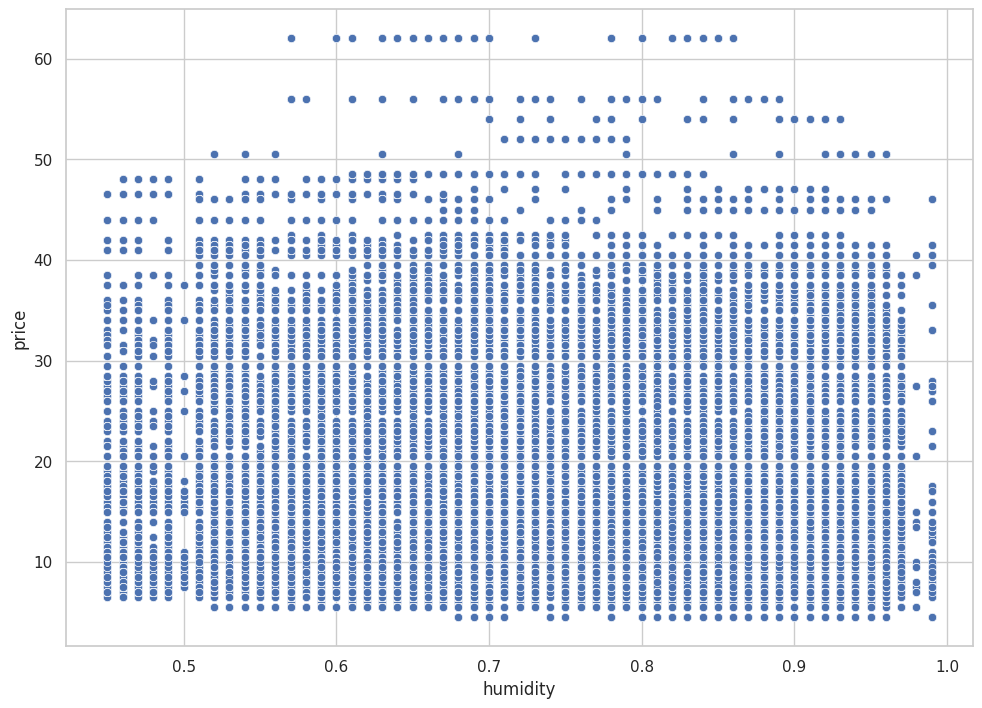

In [65]:
sns.scatterplot(data=UberWeather, x="humidity", y="price")

<Axes: xlabel='wind', ylabel='price'>

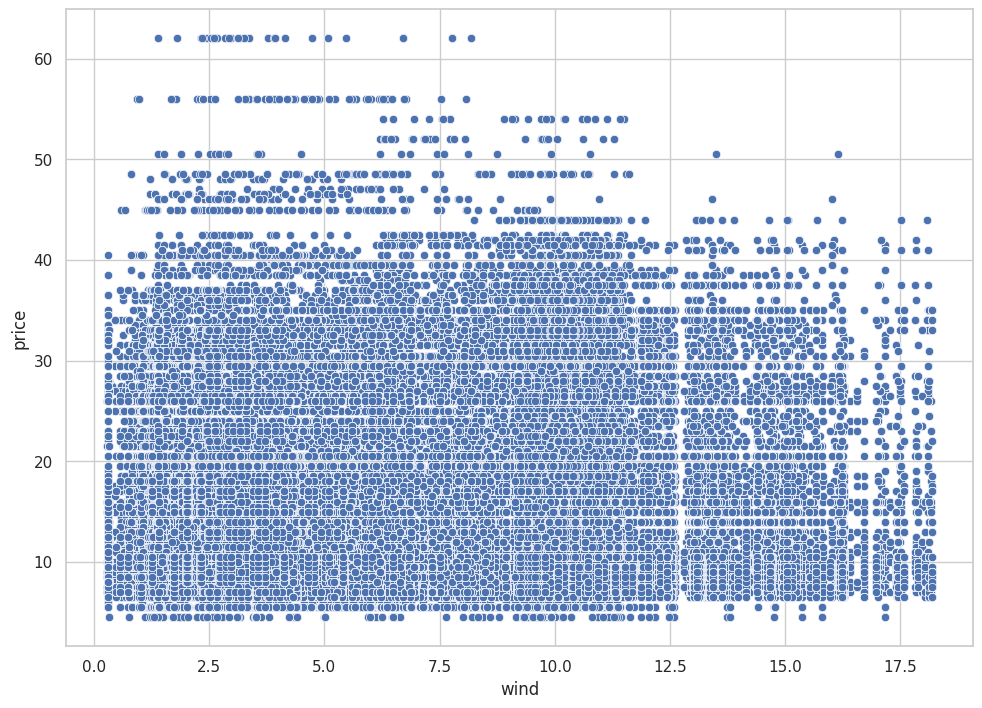

In [66]:
sns.scatterplot(data=UberWeather, x="wind", y="price")

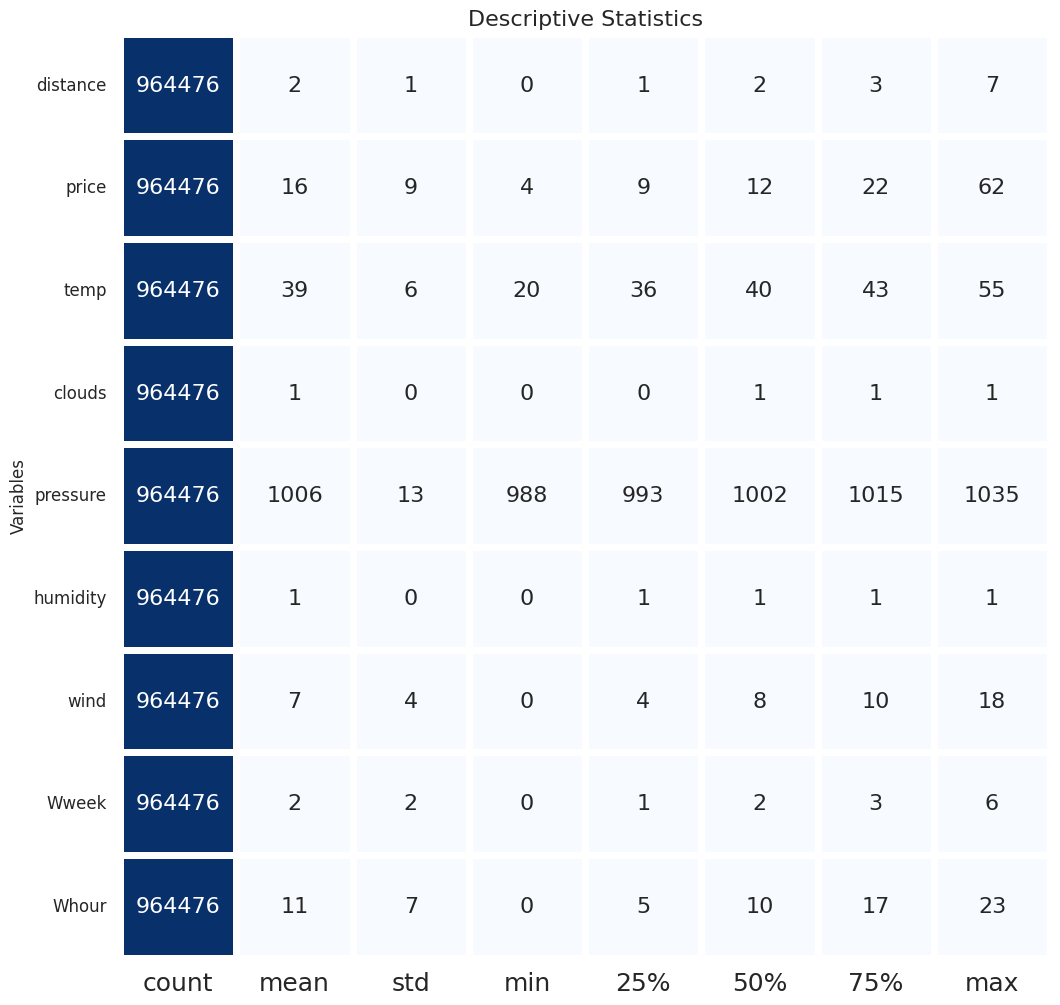

In [67]:
desc = UberWeather.describe().T
df1 = pd.DataFrame(index=['distance', 'price',
                          'temp', 'clouds', 'pressure', 'humidity', 'wind',
                           'Wweek', 'Whour'],
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(df1, annot=True,cmap = "Blues", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

**Feature Engineering**

In [68]:
UberWeather.columns

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'datetime',
       'Udate', 'temp', 'location', 'clouds', 'pressure', 'time_stamp_y',
       'humidity', 'wind', 'date_time', 'Wdate', 'Wweek', 'Whour'],
      dtype='object')

In [69]:
### Here we remove unwanted collumns for modelling. We remove columsn which have all values repeited and columns which have all distinct values.
UberMod = UberWeather.drop(['cab_type','time_stamp_x','id','product_id','datetime','Udate','time_stamp_y','date_time'], axis=1)
UberMod

,distance,destination,source,price,surge_multiplier,name,temp,location,clouds,pressure,humidity,wind,Wdate,Wweek,Whour
0,2.61,Beacon Hill,Northeastern University,28.5,1.0,Black SUV,43.27,Beacon Hill,0.80,990.80,0.71,8.30,2018-11-27,1,19
1,2.61,Beacon Hill,Northeastern University,28.5,1.0,Black SUV,45.27,Beacon Hill,1.00,989.02,0.93,1.56,2018-11-27,1,12
2,2.61,Beacon Hill,Northeastern University,28.5,1.0,Black SUV,44.28,Beacon Hill,1.00,998.13,0.89,14.34,2018-11-27,1,5
3,2.61,Beacon Hill,Northeastern University,28.5,1.0,Black SUV,44.11,Beacon Hill,0.99,1005.33,0.90,11.30,2018-11-27,1,1
4,2.61,Beacon Hill,Northeastern University,28.5,1.0,Black SUV,44.28,Beacon Hill,1.00,998.20,0.89,14.65,2018-11-27,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964471,2.67,North End,Back Bay,34.0,1.0,Black SUV,30.93,North End,0.19,1022.80,0.56,5.58,2018-12-09,6,23
964472,2.67,North End,Back Bay,34.0,1.0,Black SUV,30.90,North End,0.20,1022.79,0.57,5.61,2018-12-09,6,23
964473,2.67,North End,Back Bay,34.0,1.0,Black SUV,30.93,North End,0.19,1022.80,0.56,5.58,2018-12-09,6,23
964474,2.67,North End,Back Bay,34.0,1.0,Black SUV,30.90,North End,0.20,1022.79,0.57,5.61,2018-12-09,6,23


In [71]:
## Here we encode data by remapping it to numeric values so its easier for the model to process and be more efficient.

le = LabelEncoder()
UberMod.destination = le.fit_transform(UberMod.destination)

UberMod.source = le.fit_transform(UberMod.source)

UberMod.name = le.fit_transform(UberMod.name)

UberMod.location = le.fit_transform(UberMod.location)

UberMod.Wdate = le.fit_transform(UberMod.Wdate)

UberMod.price = le.fit_transform(UberMod.price)

UberMod

,distance,destination,source,price,surge_multiplier,name,temp,location,clouds,pressure,humidity,wind,Wdate,Wweek,Whour
0,2.61,1,8,47,1.0,1,43.27,1,0.80,990.80,0.71,8.30,1,1,19
1,2.61,1,8,47,1.0,1,45.27,1,1.00,989.02,0.93,1.56,1,1,12
2,2.61,1,8,47,1.0,1,44.28,1,1.00,998.13,0.89,14.34,1,1,5
3,2.61,1,8,47,1.0,1,44.11,1,0.99,1005.33,0.90,11.30,1,1,1
4,2.61,1,8,47,1.0,1,44.28,1,1.00,998.20,0.89,14.65,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964471,2.67,6,0,58,1.0,1,30.93,6,0.19,1022.80,0.56,5.58,9,6,23
964472,2.67,6,0,58,1.0,1,30.90,6,0.20,1022.79,0.57,5.61,9,6,23
964473,2.67,6,0,58,1.0,1,30.93,6,0.19,1022.80,0.56,5.58,9,6,23
964474,2.67,6,0,58,1.0,1,30.90,6,0.20,1022.79,0.57,5.61,9,6,23


**Model Building**

Here we begin with our modelling. We seperate the dependent variable from the independent ones

In [72]:
X = UberMod.drop('price',axis=1)
Y = UberMod['price']
#X=UberWeather[['distance','temp','clouds','humidity','pressure','day','hour','rain', 'surge_multiplier']]
#Y=UberWeather['price']

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state=12345)

In [74]:
print('DataFrame Shape:', UberMod.shape)
print('*'*25)
print('X Train Shape:', X_train.shape)
print('*'*25)
print('X Test Shape:', X_test.shape)
print('*'*25)
print('Y Train Shape:', y_train.shape)
print('*'*25)
print('Y Test Shape:', y_test.shape)

DataFrame Shape: (964476, 15)
*************************
X Train Shape: (646198, 14)
*************************
X Test Shape: (318278, 14)
*************************
Y Train Shape: (646198,)
*************************
Y Test Shape: (318278,)


There are several algorithmns we will use LinearRegression as its best and fastest with satisfactory results.

In [75]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [76]:
pred=model.predict(X_test)
pred

array([ 0.67649457, 35.17368414,  6.06686443, ..., 10.82865689,
       40.8398664 , 12.60300971])

In [77]:
data=pd.DataFrame({'Actual Data': y_test, 'Prediction Data': pred})

In [ ]:

data1=data.head(25)
data1.plot(kind='bar',figsize=(27,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='blue')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [79]:

# instantiate the model
reg = LinearRegression()

# call cross_val_score
cv_results = cross_val_score(reg, X_train, y_train, cv=5)

print(f'Scores: {np.round(cv_results, 3)}')
print(f'Scores mean: {np.round(np.mean(cv_results), 3)}')

Scores: [0.43  0.432 0.43  0.431 0.429]
Scores mean: 0.43


In [80]:
def GetModels():
    models = []
    models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,
                                             objective='binary:logistic',
                                             random_state=0,eval_metric='mlogloss')])
    models.append(['Logistic Regression',LogisticRegression(random_state=0)])
    models.append(['SVM',SVC(random_state=0)])
    models.append(['KNeigbors',KNeighborsClassifier()])
    models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
    models.append(['RandomForest',RandomForestClassifier(random_state=0)])
    models.append(['AdaBoostClassifier',AdaBoostClassifier()])
    return models

**Checking Error**

In [81]:
error = np.sqrt(metrics.mean_absolute_error(y_test, pred))
error

3.2481167166423246

**Regularized regression**

**Ridge Regression**

In [83]:
# Ridge


# instantiate the model
ridge = Ridge(alpha=0.1)

# fit the model
ridge.fit(X_train, y_train)

# predict on the test data
ridge_pred = ridge.predict(X_test)

# get the score
rs = ridge.score(X_test, y_test)

print(f'Ridge Score: {round(rs, 4)}')

Ridge Score: 0.4312


**Lasso Regression**

In [84]:
# Lasso Regression


# instantiate the regressor
lasso = Lasso(alpha=0.1)

# fit the model
lasso.fit(X_train, y_train)

# predict on the test data
lasso_pred = lasso.predict(X_test)

# get the score
ls = lasso.score(X_test, y_test)

print(f'Ridge Score: {round(ls, 4)}')

Ridge Score: 0.4312


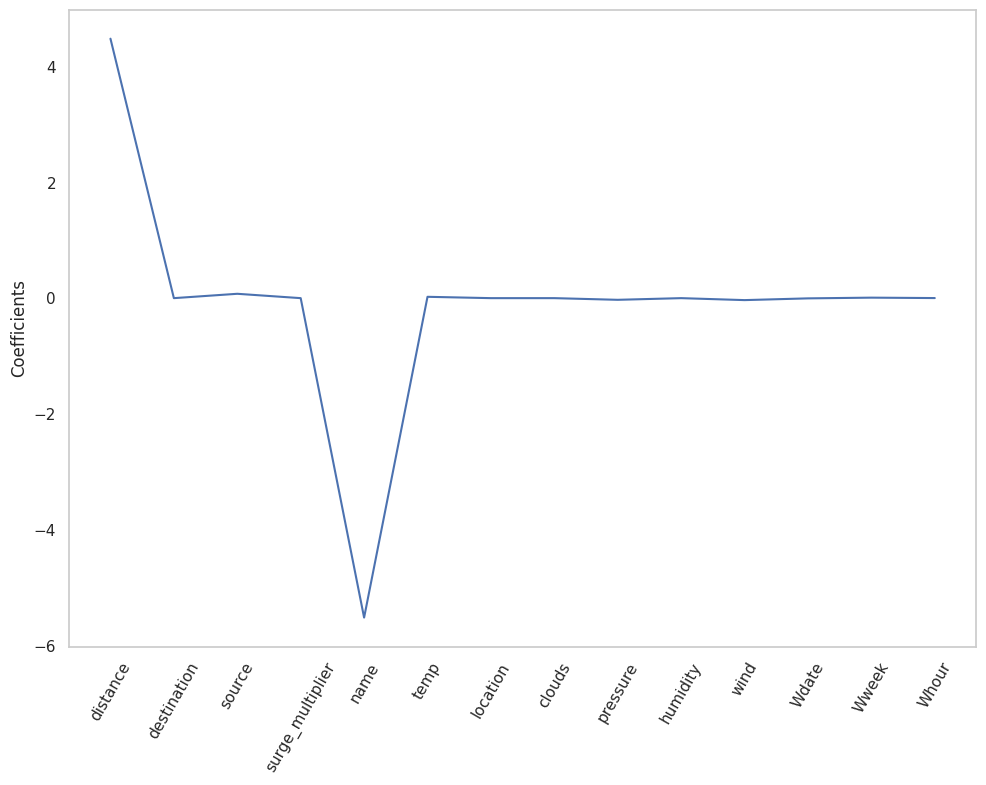

In [86]:
# Lasso Regression for Feature Selection


# store the feature names
names = X_train.columns

# instantiate the regressor
lasso = Lasso(alpha=0.1)

# extract and store the coef attribute
lasso_coef = lasso.fit(X, Y).coef_

plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.grid()
plt.show()

In [87]:
def display_plot(cv_scores, cv_scores_std, alpha_space):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores, label='CV Scores')

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, color='violet', alpha=0.2, label='CV Score ± std error')
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5', label='Max CV Score')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

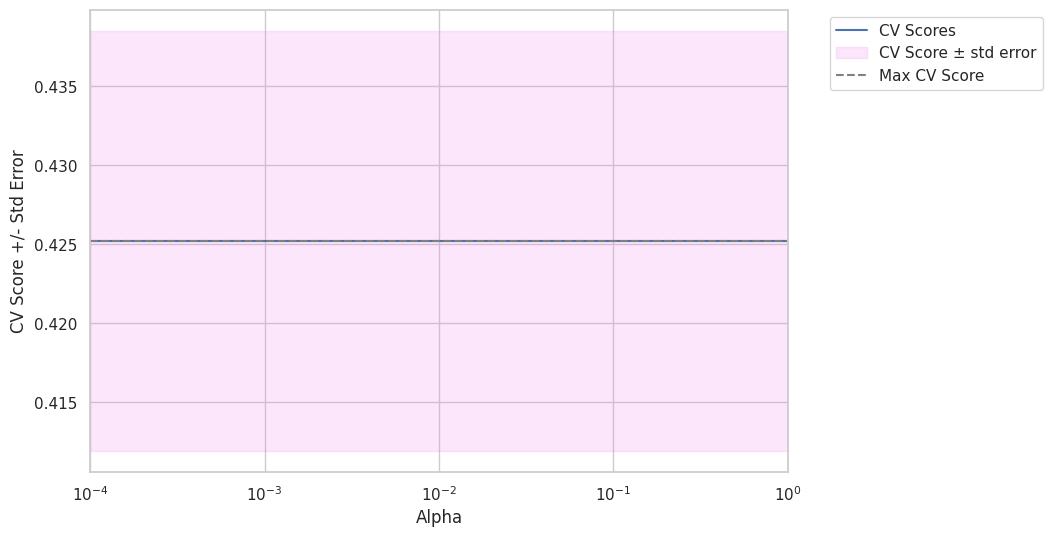

In [89]:

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge()

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha

    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, Y, cv=10)

    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))

    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std, alpha_space)

**Fine-tuning the model**

In [90]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=8)


# fit the training data
knn.fit(X_train, y_train)

# predict the labels fo the test set
y_pred = knn.predict(X_test)

# confusion_matrix
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

# classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Confusion Matrix:
[[ 351    0    0 ...    0    0    0]
 [   0 1939    4 ...    0    0    0]
 [   0    0  292 ...    0    0    0]
 ...
 [   0    0    0 ...   87    0    0]
 [   0    0    0 ...    0   42    0]
 [   0    0    0 ...    0    0   27]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       351
           1       0.67      0.76      0.71      2552
           2       0.58      0.74      0.65       397
           3       0.74      0.80      0.76      5338
           4       0.78      0.88      0.83     16747
           5       0.77      0.78      0.78     16237
           6       0.73      0.78      0.75     14041
           7       0.76      0.78      0.77     16693
           8       0.73      0.73      0.73     10571
           9       0.74      0.76      0.75     18615
          10       0.80      0.80      0.80      7751
          11       0.76      0.78      0.77     18837
          12       0.71   

**Saving Model**

In [91]:
from joblib import dump, load
dump(model, 'UberP.joblib')

['UberP.joblib']